# Project5: PISA2012:
## By: Merna Ahmed Elshanawany

## Preliminary Wrangling

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. 
Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df= pd.read_csv('pisa2012.csv', encoding='latin-1')
df.shape
df.info()
df.dtypes
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


Unnamed: 0      CNT  SUBNATIO  STRATUM      OECD       NC  SCHOOLID  \
0           1  Albania     80000  ALB0006  Non-OECD  Albania         1   
1           2  Albania     80000  ALB0006  Non-OECD  Albania         1   
2           3  Albania     80000  ALB0006  Non-OECD  Albania         1   
3           4  Albania     80000  ALB0006  Non-OECD  Albania         1   
4           5  Albania     80000  ALB0006  Non-OECD  Albania         1   

   STIDSTD  ST01Q01  ST02Q01  ...  W_FSTR75  W_FSTR76 W_FSTR77 W_FSTR78  \
0        1       10      1.0  ...   13.7954   13.9235  13.1249  13.1249   
1        2       10      1.0  ...   13.7954   13.9235  13.1249  13.1249   
2        3        9      1.0  ...   12.7307   12.7307  12.7307  12.7307   
3        4        9      1.0  ...   12.7307   12.7307  12.7307  12.7307   
4        5        9      1.0  ...   12.7307   12.7307  12.7307  12.7307   

   W_FSTR79 W_FSTR80 WVARSTRR VAR_UNIT SENWGT_STU  VER_STU  
0    4.3389  13.0829       19        1     0.2098  22NOV13  
1    4.3389  13.0829       19        1     0.2098  22NOV13  
2    4.2436  12.7307       19        1     0.1999  22NOV13  
3    4.2436  12.7307       19        1     0.1999  22NOV13  
4    4.2436  12.7307       19        1     0.1999  22NOV13  

[5 rows x 636 columns]

### What is the structure of your dataset?

We have 485490 entries(rows) and 636 columns. 
The data types of our data set are either floats, integers or objects. 

### What is/are the main feature(s) of interest in your dataset?

* Which is the most participating country in our PISA evaluation ? and What is the distribution of the other countries? 
* Is there a significant difference between males and females regarding international grades? Which appear to be more successful? 
* Is there a relationship between the national study program and the international grades of the students? 
* Show the distribution of students interested in maths
* How do students perform in reading, maths and science? 
* Is there a relationship between either of the maths , reading or science grades? 
* Show the distribution of Mother & father job status through different international grades.  


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I am  not using all the columns in this data set because I have specific points of interest to answer as mentioned above. 
Thus, I would use columns like the following, 

    CNT	    Country code 3-character
    NC         National Center code
    SCHOOLID   School ID
    STIDSTD	Student ID
    ST01Q01	International Grade
    
    ST02Q01	National Study Programme
    ST04Q01	Gender
    ST29Q06	Math Interest - Interested
    
    ST15Q01	Mother Current Job Status
    ST19Q01	Father Current Job Status
    
    PV1MATH	Plausible value 1 in mathematics
    PV2MATH	Plausible value 2 in mathematics
    PV3MATH	Plausible value 3 in mathematics
    PV4MATH	Plausible value 4 in mathematics
    PV5MATH	Plausible value 5 in mathematics

    PV1READ	Plausible value 1 in reading
    PV2READ	Plausible value 2 in reading
    PV3READ	Plausible value 3 in reading
    PV4READ	Plausible value 4 in reading
    PV5READ	Plausible value 5 in reading

    PV1SCIE	Plausible value 1 in science
    PV2SCIE	Plausible value 2 in science
    PV3SCIE	Plausible value 3 in science
    PV4SCIE	Plausible value 4 in science
    PV5SCIE	Plausible value 5 in science


## Exploratory Analysis:


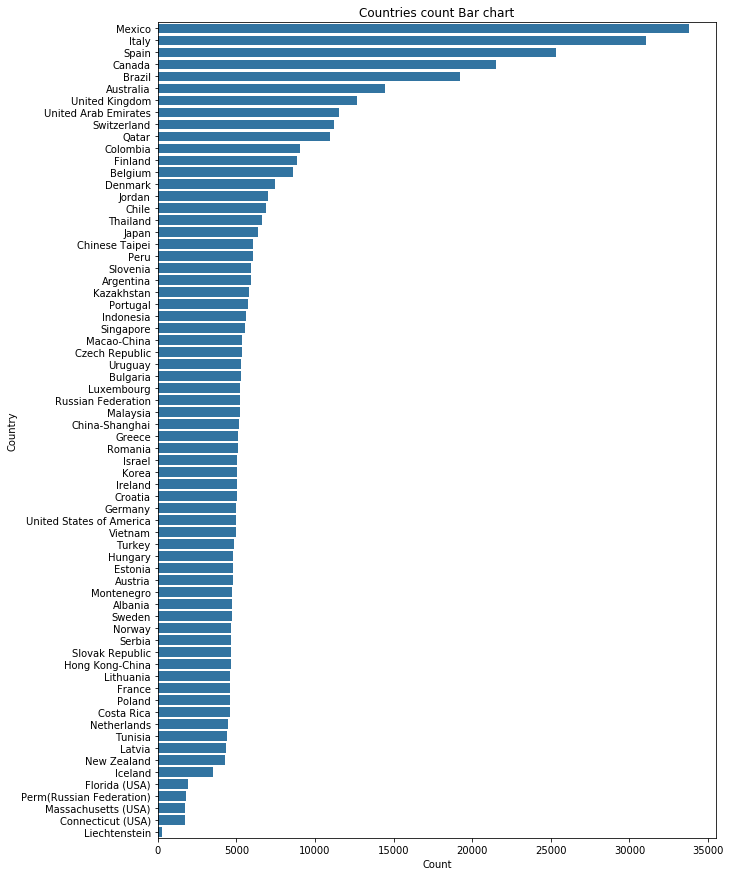

In [3]:
#First, we are interested in visualizing the participation of different countries in our PISA surveys.
#Which is the most participating country in our PISA evaluation ? and What is the distribution of the other countries? 

plt.figure(figsize = [10, 15])
base_color = sb.color_palette()[0]
cat_order = df['CNT'].value_counts().index
sb.countplot(data = df, y = 'CNT', color = base_color, order = cat_order);
plt.title('Countries count Bar chart');
plt.xlabel('Count');
plt.ylabel('Country');

#We put the countries on the y axis in order to be able to see all the country names. 

We found out from the bar chart that we have significantly 5 highly participating countries in our survey which are Mexico, Italy, Spain, Canada and Brazil. 

We will now zoom into the bar chart a bit to see approximately the contributions of each of the top participating countries.

In [4]:
#We first create a dataframe that contains only the top participating countries as follows, 

top_countries = df.loc[df['CNT'].isin(['Mexico','Italy','Spain','Canada','Brazil'])]
top_countries

Unnamed: 0     CNT  SUBNATIO  STRATUM      OECD       NC  SCHOOLID  \
55266        55267  Brazil    760000  BRA1439  Non-OECD  Brazil          1   
55267        55268  Brazil    760000  BRA1439  Non-OECD  Brazil          1   
55268        55269  Brazil    760000  BRA1439  Non-OECD  Brazil          1   
55269        55270  Brazil    760000  BRA1439  Non-OECD  Brazil          1   
55270        55271  Brazil    760000  BRA1439  Non-OECD  Brazil          1   
...            ...     ...       ...      ...       ...      ...       ...   
349504      349505  Mexico   4840000  MEX0410      OECD  Mexico       1471   
349505      349506  Mexico   4840000  MEX0410      OECD  Mexico       1471   
349506      349507  Mexico   4840000  MEX0410      OECD  Mexico       1471   
349507      349508  Mexico   4840000  MEX0410      OECD  Mexico       1471   
349508      349509  Mexico   4840000  MEX0410      OECD  Mexico       1471   

        STIDSTD  ST01Q01  ST02Q01  ...  W_FSTR75  W_FSTR76 W_FSTR77 W_FSTR78  \
55266         1        8      1.0  ...   86.0632   88.5187  28.6877  28.0423   
55267         2        8      1.0  ...   86.0632   88.5187  28.6877  28.0423   
55268         3       10      1.0  ...   82.5611   82.5611  27.5204  27.5204   
55269         4        9      1.0  ...   86.0632   88.5187  28.6877  28.0423   
55270         5        8      1.0  ...   86.0632   88.5187  28.6877  28.0423   
...         ...      ...      ...  ...       ...       ...      ...      ...   
349504    33802       10      5.0  ...    3.5540   10.6619  10.6619  10.6619   
349505    33803       10      5.0  ...    3.5540   10.6619  10.6619  10.6619   
349506    33804       10      5.0  ...    3.5540   10.6619  10.6619  10.6619   
349507    33805       10      5.0  ...    3.5540   10.6619  10.6619  10.6619   
349508    33806       10      5.0  ...    3.5540   10.6619  10.6619  10.6619   

        W_FSTR79 W_FSTR80 WVARSTRR VAR_UNIT SENWGT_STU  VER_STU  
55266    28.0423  28.0423       72        2     0.0243  22NOV13  
55267    28.0423  28.0423       72        2     0.0243  22NOV13  
55268    27.5204  27.5204       72        2     0.0233  22NOV13  
55269    28.0423  28.0423       72        2     0.0243  22NOV13  
55270    28.0423  28.0423       72        2     0.0243  22NOV13  
...          ...      ...      ...      ...        ...      ...  
349504   10.6619   3.5540       61        1     0.0054  22NOV13  
349505   10.6619   3.5540       61        1     0.0054  22NOV13  
349506   10.6619   3.5540       61        1     0.0054  22NOV13  
349507   10.6619   3.5540       61        1     0.0054  22NOV13  
349508   10.6619   3.5540       61        1     0.0054  22NOV13  

[130940 rows x 636 columns]

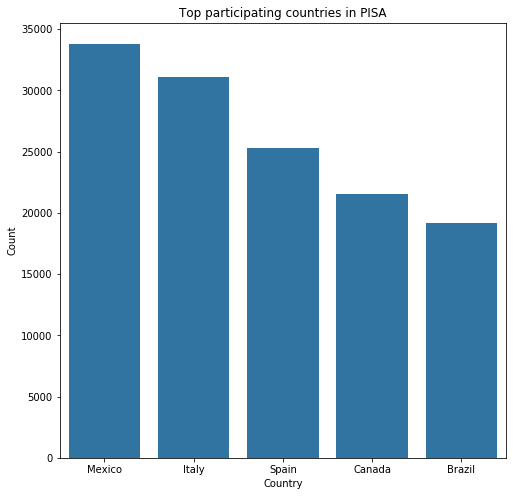

In [5]:
#then we visualize the top countries dataframe using a bar chart( Univariate exploration)

plt.figure(figsize = [8, 8])
base_color = sb.color_palette()[0]
cat_order = top_countries['CNT'].value_counts().index
sb.countplot(data = top_countries, x = 'CNT', color = base_color, order = cat_order);
plt.title('Top participating countries in PISA');
plt.xlabel('Country');
plt.ylabel('Count');

This bar chart shows that Mexico has the highest count (a little bit less than 35000) between countries to participate in the PISA evaluation followed by Italy (around 30000) and then Spain(25000) , Canada (a bit above 20000)and Brazil(a bit less than 20000). 

After Brazil the differences between countries participation isn't very significant (<15000). 

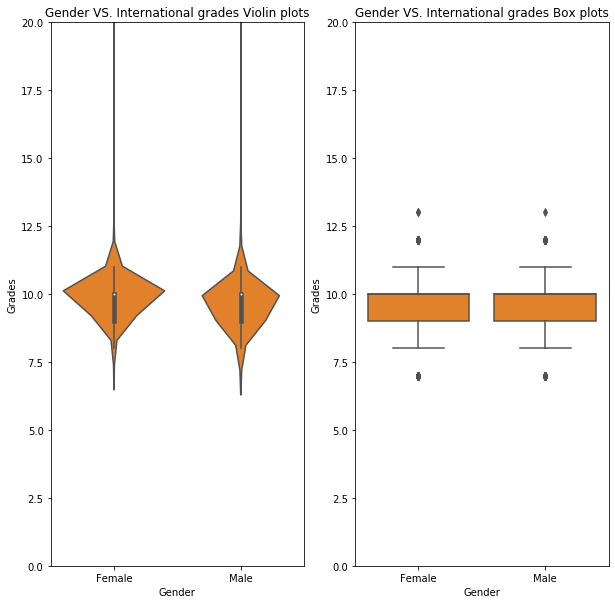

In [6]:
#Second, We focus on the students and different trends concerning their grades and interest in different subjects.
#Is there a significant difference between males and females regarding international grades? 
#Which appear to be more successful? 

#I used here violin plots and box plots because we have Quantitative and Qualitative variables (Bivariate exploration)

plt.figure(figsize = [10, 10])
base_color = sb.color_palette()[1]
# left plot: violin plot
plt.subplot(1, 2, 1)
sb.violinplot(data = df, x = 'ST04Q01', y = 'ST01Q01', color = base_color)
plt.title('Gender VS. International grades Violin plots');
plt.xlabel('Gender');
plt.ylabel('Grades');
plt.ylim(0,20);

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df, x = 'ST04Q01', y = 'ST01Q01', color = base_color)
plt.title('Gender VS. International grades Box plots');
plt.xlabel('Gender');
plt.ylabel('Grades');
plt.ylim(0,20);

#The ylim function was used here to focuse on the distribution of the grades and try to spot any patterns.
#I used a different color from the palette for the sake of trying new colors but it seems like the blue color is the best.

The box plots as shown don't show any significant difference in grades between males and females. 
While, the violin plots show slightly a higher probability that females get higher grades than males. 

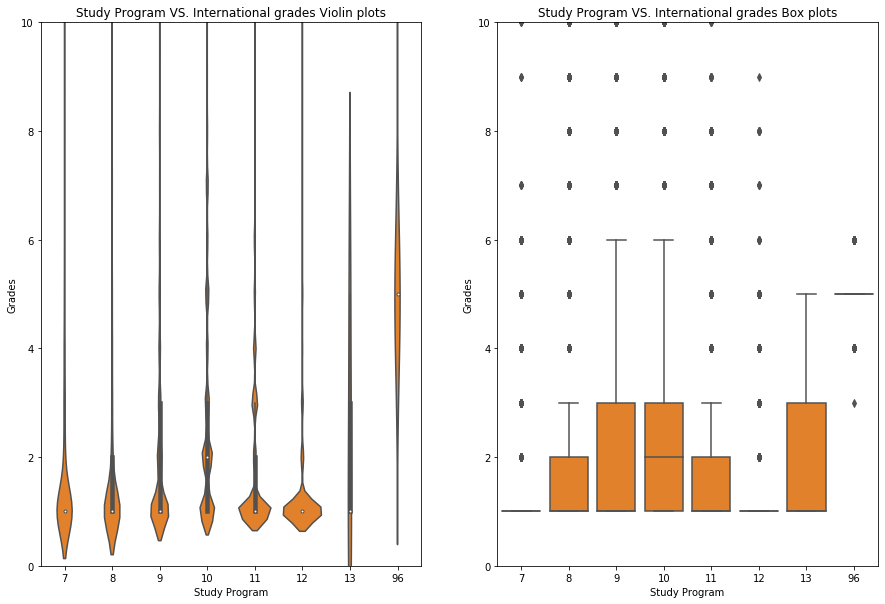

In [7]:
#Is there a relationship between the national study program and the international grades of the students?
#I used here violin plots and box plots because we have Quantitative and Qualitative variables (Bivariate exploration)

plt.figure(figsize = [15, 10])
base_color = sb.color_palette()[1]
# left plot: violin plot
plt.subplot(1, 2, 1)
sb.violinplot(data = df, y = 'ST02Q01', x = 'ST01Q01', color = base_color)
plt.title('Study Program VS. International grades Violin plots');
plt.xlabel('Study Program');
plt.ylabel('Grades');
plt.ylim(0,10);

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df, y = 'ST02Q01', x = 'ST01Q01', color = base_color)
plt.title('Study Program VS. International grades Box plots');
plt.xlabel('Study Program');
plt.ylabel('Grades');
plt.ylim(0,10);

As per the violin plots shown here, the study programs 96, 7 & 13 show least probability for the students to achieve higher grades, while program 12 has the highest probability. 

As per the box plots shown, programs 9 and 10 have the widest range of grades followed by program 13 then programs 8 and 11.

Both violin and box plots show the appearence of lots of outliers.

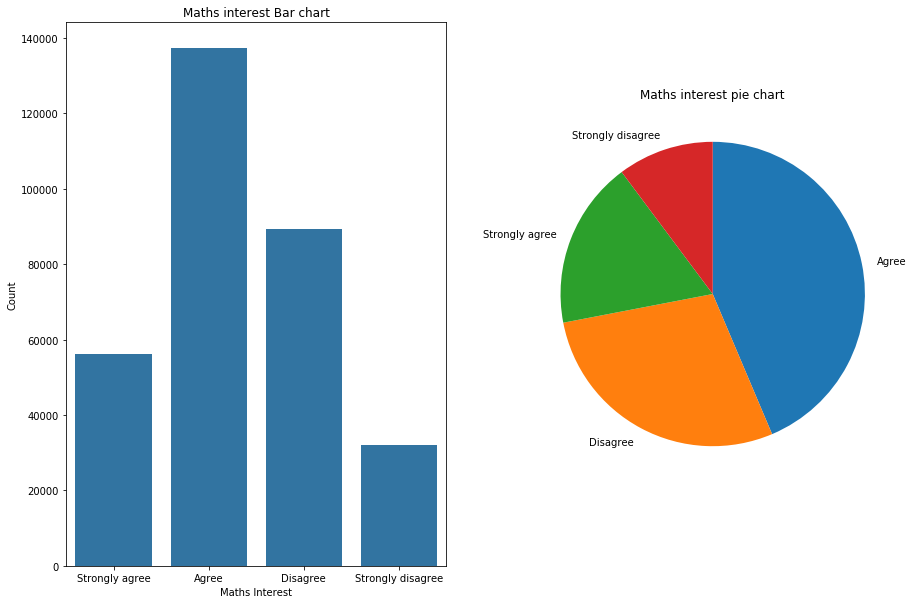

In [8]:
#Show the distribution of students interested in maths.

level_order = ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True , categories = level_order)
df['ST29Q06'] = df['ST29Q06'].astype(ordered_cat)
plt.figure(figsize = [15, 10])

# left plot: Bar chart
plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'ST29Q06', color = base_color);
plt.title('Maths interest Bar chart');
plt.xlabel('Maths Interest');
plt.ylabel('Count');

# right plot: pie chart
plt.subplot(1, 2, 2)
sorted_counts = df['ST29Q06'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.title('Maths interest pie chart');

Most students Agree to their interest in Maths (a little bit less than 140000) then they seeem to disagree to being interested in maths (around 90000) then strongly agree and finally strongly disagreeing to maths interest. 

In [9]:
#How do students perform in reading, maths and science? 
#This question will need some data wrangling steps.
## Assess step: We need to make a smaller df that contains our data of interest.
#first we make a df called df1 which contains the students country, gender & plausible values in reading, maths & science.
#this is to help us analyze the reading, maths and science sections alone and answer our question here. 

df1 = df[['CNT', 'ST04Q01', 'PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH', 
         'PV1READ','PV2READ', 'PV3READ','PV4READ', 'PV5READ',
         'PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']]
print(df1.head())
print(df1.info())

       CNT ST04Q01   PV1MATH   PV2MATH   PV3MATH   PV4MATH   PV5MATH  \
0  Albania  Female  406.8469  376.4683  344.5319  321.1637  381.9209   
1  Albania  Female  486.1427  464.3325  453.4273  472.9008  476.0165   
2  Albania  Female  533.2684  481.0796  489.6479  490.4269  533.2684   
3  Albania  Female  412.2215  498.6836  415.3373  466.7472  454.2842   
4  Albania  Female  381.9209  328.1742  403.7311  418.5309  395.1628   

    PV1READ   PV2READ   PV3READ   PV4READ   PV5READ   PV1SCIE   PV2SCIE  \
0  249.5762  254.3420  406.8496  175.7053  218.5981  341.7009  408.8400   
1  406.2936  349.8975  400.7334  369.7553  396.7618  548.9929  471.5964   
2  401.2100  404.3872  387.7067  431.3938  401.2100  499.6643  428.7952   
3  547.3630  481.4353  461.5776  425.0393  471.9036  438.6796  481.5740   
4  311.7707  141.7883  293.5015  272.8495  260.1405  361.5628  275.7740   

    PV3SCIE   PV4SCIE   PV5SCIE  
0  348.2283  367.8105  392.9877  
1  471.5964  443.6218  454.8116  
2  492.2044  5

In [10]:
## Code step:
# Now, we make new columns for the maths, sciencve and reading average scores of the students.

df1["Math_grade"]= df1.filter(like= "MATH").mean(axis=1)
df1["Read_grade"]= df1.filter(like= "READ").mean(axis=1)
df1["Science_grade"]= df1.filter(like= "SCIE").mean(axis=1)
df1.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

CNT ST04Q01   PV1MATH   PV2MATH   PV3MATH   PV4MATH   PV5MATH  \
0  Albania  Female  406.8469  376.4683  344.5319  321.1637  381.9209   
1  Albania  Female  486.1427  464.3325  453.4273  472.9008  476.0165   
2  Albania  Female  533.2684  481.0796  489.6479  490.4269  533.2684   
3  Albania  Female  412.2215  498.6836  415.3373  466.7472  454.2842   
4  Albania  Female  381.9209  328.1742  403.7311  418.5309  395.1628   

    PV1READ   PV2READ   PV3READ   PV4READ   PV5READ   PV1SCIE   PV2SCIE  \
0  249.5762  254.3420  406.8496  175.7053  218.5981  341.7009  408.8400   
1  406.2936  349.8975  400.7334  369.7553  396.7618  548.9929  471.5964   
2  401.2100  404.3872  387.7067  431.3938  401.2100  499.6643  428.7952   
3  547.3630  481.4353  461.5776  425.0393  471.9036  438.6796  481.5740   
4  311.7707  141.7883  293.5015  272.8495  260.1405  361.5628  275.7740   

    PV3SCIE   PV4SCIE   PV5SCIE  Math_grade  Read_grade  Science_grade  
0  348.2283  367.8105  392.9877   366.18634   261.01424      371.91348  
1  471.5964  443.6218  454.8116   470.56396   384.68832      478.12382  
2  492.2044  512.7191  499.6643   505.53824   405.18154      486.60946  
3  448.9370  474.1141  426.5573   449.45476   477.46376      453.97240  
4  372.7527  403.5248  422.1746   385.50398   256.01010      367.15778

In [11]:
#Then we drop the original 5 plausible value columns for reading, maths and science as follows, 

df1.drop(columns = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH'],inplace = True)
df1.drop(columns = ['PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ'],inplace = True)
df1.drop(columns = ['PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'],inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
## Test step: We test our code through displaying the head of our new df as follows, 
df1.head()

CNT ST04Q01  Math_grade  Read_grade  Science_grade
0  Albania  Female   366.18634   261.01424      371.91348
1  Albania  Female   470.56396   384.68832      478.12382
2  Albania  Female   505.53824   405.18154      486.60946
3  Albania  Female   449.45476   477.46376      453.97240
4  Albania  Female   385.50398   256.01010      367.15778

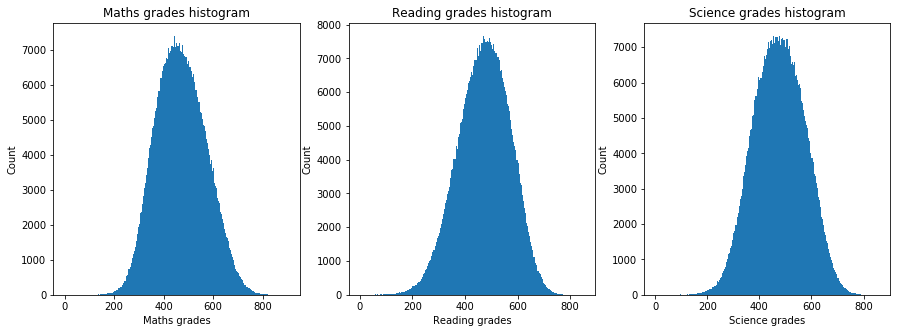

In [13]:
#We can now plot our histograms as follows, 

plt.figure(figsize = [15, 5])

# left plot: math grades histogram:
plt.subplot(1, 3, 1)
bin_edges = np.arange(0, df1['Math_grade'].max()+4, 4)
plt.hist(data = df1, x = 'Math_grade', bins = bin_edges);
plt.title('Maths grades histogram');
plt.xlabel('Maths grades');
plt.ylabel('Count');

# Middle plot: reading grades histogram:
plt.subplot(1, 3, 2)
bin_edges = np.arange(0, df1['Read_grade'].max()+4, 4)
plt.hist(data = df1, x = 'Read_grade', bins = bin_edges);
plt.title('Reading grades histogram');
plt.xlabel('Reading grades');
plt.ylabel('Count');

# left plot: Science grades histogram:
plt.subplot(1, 3, 3)
bin_edges = np.arange(0, df1['Science_grade'].max()+4, 4)
plt.hist(data = df1, x = 'Science_grade', bins = bin_edges);
plt.title('Science grades histogram');
plt.xlabel('Science grades');
plt.ylabel('Count');

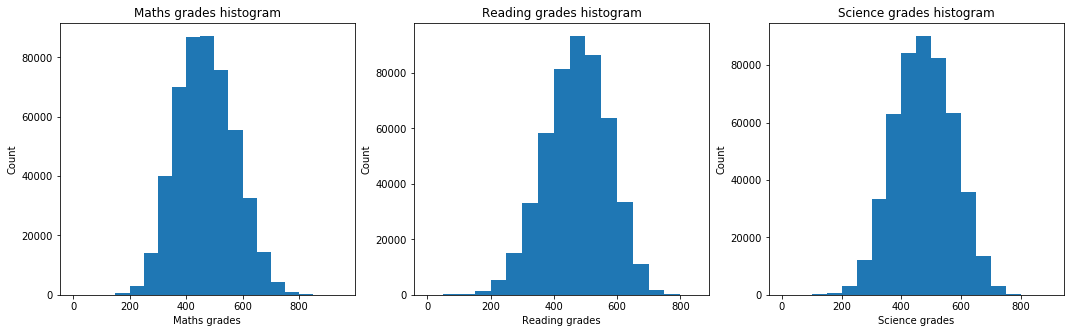

In [14]:
#We now change the bin edges to try and spot any significant patterns. 

plt.figure(figsize = [18, 5])

# left plot: math grades histogram:
plt.subplot(1, 3, 1)
bin_edges = np.arange(0, df1['Math_grade'].max()+50, 50)
plt.hist(data = df1, x = 'Math_grade', bins = bin_edges);
plt.title('Maths grades histogram');
plt.xlabel('Maths grades');
plt.ylabel('Count');

# Middle plot: reading grades histogram:
plt.subplot(1, 3, 2)
bin_edges = np.arange(0, df1['Read_grade'].max()+50, 50)
plt.hist(data = df1, x = 'Read_grade', bins = bin_edges);
plt.title('Reading grades histogram');
plt.xlabel('Reading grades');
plt.ylabel('Count');

# left plot: Science grades histogram:
plt.subplot(1, 3, 3)
bin_edges = np.arange(0, df1['Science_grade'].max()+50, 50)
plt.hist(data = df1, x = 'Science_grade', bins = bin_edges);
plt.title('Science grades histogram');
plt.xlabel('Science grades');
plt.ylabel('Count');

As we can see here most of the students score in maths, reading and science in a range between 200 and 800 grades. 
All histograms appear to be normally distributed with no skews spotted.

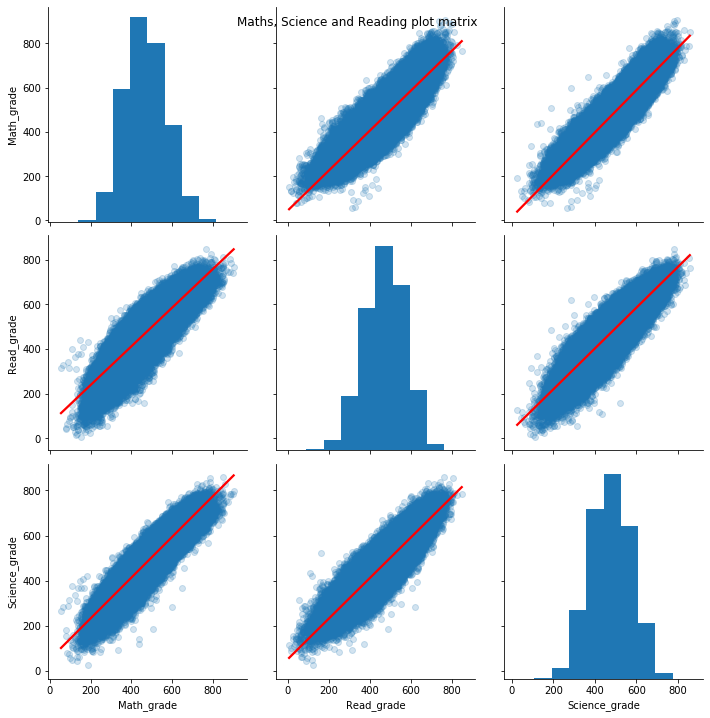

In [15]:
#Third, We are now interested in some relation ships between different factors like the following, 
#Is there a relationship between either of the maths , reading or science grades? 
#We now spot a multivariate scatter plot matrix to visualize all the relationships possible between our 3 variables. 

g = sb.pairplot(df1, kind='reg', plot_kws={'line_kws':{'color':'red'},'scatter_kws': {'alpha': 1/5}});
g.fig.set_size_inches(10,10);
g.fig.suptitle("Maths, Science and Reading plot matrix");

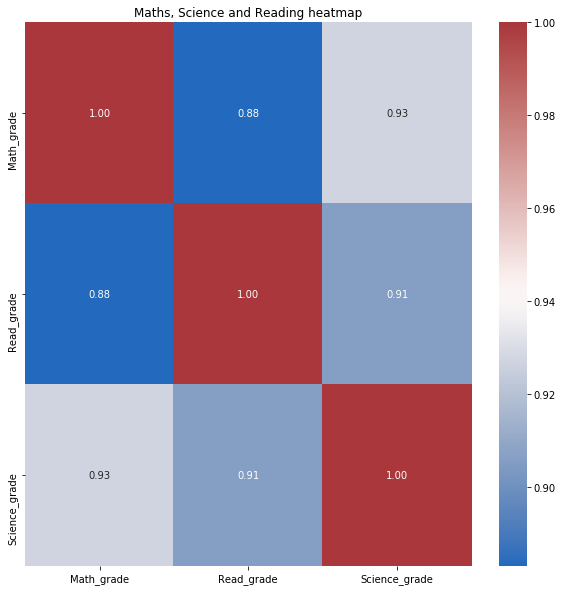

In [16]:
#We can also visualize the relationships using a heatmap with correlation coefficients marked. 

plt.figure(figsize = [10, 10]) 
ax = sb.heatmap(df1.corr(), annot = True, fmt = '.2f', cmap = 'vlag').set_title('Maths, Science and Reading heatmap');

Both of the scatter plot matrix and the heat map suggest a strong positive correlation between our 3 variables (Math grades, reading grades and science grades) with the strongest correlation between Science grades and Math grades (r= 0.93).

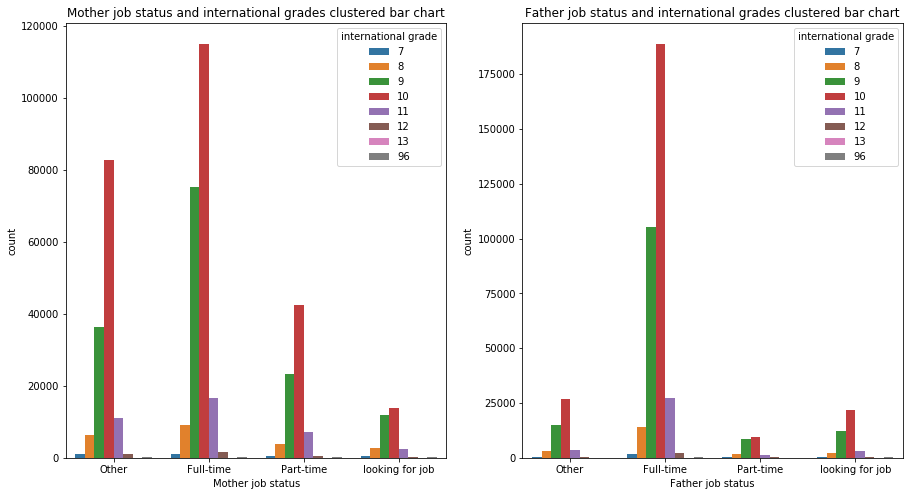

In [17]:
#Finally, the distribution of the mother and father job status might give us interesting insights into the students lives.
# Show the distribution of Mother & father job status through different international grades. 

plt.figure(figsize=[15,8])

#left plot: clustered bar chart for mothers job status:
plt.subplot(1, 2, 1)
ax = sb.countplot(data = df, x = 'ST15Q01', hue = 'ST01Q01');
ax.legend(title = 'international grade',loc='upper right');
plt.xlabel('Mother job status');
plt.title('Mother job status and international grades clustered bar chart');
xlabels = ['Other', 'Full-time','Part-time', 'looking for job']
ax.set_xticklabels(xlabels);


#right plot: clustered bar chart for mothers job status:
plt.subplot(1, 2, 2)
ax = sb.countplot(data = df, x = 'ST19Q01', hue = 'ST01Q01');
ax.legend(title = 'international grade',loc='upper right');
plt.xlabel('Father job status');
plt.title('Father job status and international grades clustered bar chart');
xlabels = ['Other', 'Full-time','Part-time', 'looking for job']
ax.set_xticklabels(xlabels);

In the Mother status bar chart, the working full time mother has the highest counts followed by the mother that is retired or doing home duties and finally followed by working part time mothers.

In the Father status bar chart, the wroking full time father has the highest count (>175000) even higher than the working full time mother in the first bar chart (a bit less than 120000) , but all other fathers (either working part time or not working or doing home duties) appear to be much less than a mother doing home duties or a retired mother. 

In both clustered bar charts, the program 10 appears to have the highest count followed by program 9. 

# Explanatory Analysis:

# Conclusion:

* Mexico is the highest participating country in PISA surveys with the highest count (35000) followed by Italy (31250) and then Spain(25000) , Canada (21250) and Brazil(19000).
* There is no significant difference between male and female students regarding their international grades. They seem to have similar probability of scoring the same with a very slight higher probability in females than males. 
* The study programs 96, 7 & 13 show least probability for the students to achieve higher grades, while program 12 has the highest probability. 
* The study programs 9 and 10 have the widest range of grades followed by program 13 then programs 8 and 11.
* We can see lots of outliers in almost all study programs which need further investigation for better analysis. 
* Most students Agree to their interest in Maths (acount that is a little bit less than 140000) then they seeem to disagree to being interested in maths (around 90000) then strongly agree and finally strongly disagreeing to maths interest which is pretty much interesting as a distribution, because we normally expect that the agreeing students to math interest should be somehow close to those strongly agreeing to the same idea - and the other way around -, but exceptionally it doesn't look like this way here.
* We needed to perform some wrangling steps to visualize the distributuin of the students grades in reading, maths and science. 
* Most of the students score in maths, reading and science in a range between 200 and 800 grades. 
* Maths, Reading and Science score all apear to be normally distributed in our histograms among students. 
* A strong positive correlation can be seen here between our 3 variables (Math grades, reading grades and science grades) with the strongest correlation between Science grades and Math grades (r= 0.93).
* In the Mother status bar chart, the working full time mother has the highest counts followed by the mother that is retired or doing home duties and finally followed by working part time mothers.
* In the Father status bar chart, the wroking full time father has the highest count (>175000) even higher than the working full time mother in the first bar chart (a bit less than 120000) , but all other fathers (either working part time or not working or doing home duties) appear to be much less than a mother doing home duties or a retired mother. 
* In both clustered bar charts, the program 10 appears to have the highest count followed by program 9. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Most of the distributions visualized above were normal and didn't seem unusual for example the normal distribution histogram of the reading, maths and science grades among students. Thus, most of the time I didn't need to perform any transformations on my visualizations, I sometimes just zoomed in a specific part of a visualization to try and spot additional trends like in the first bar chart demonstrating the distribution of countries participating in the survey, another example is when I changed the bin edges in the reading, maths and science histograms to try and spot special patterns.

There was just the violin plot and box plot charts demonstrating the relationship between national study programs and the international grades of the students where there were lots of Outliers that need further investigation. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Concerning unusual distributions, we normally expect that the agreeing students to math interest should be somehow close to those strongly agreeing to the same idea - and the other way around -, but exceptionally it doesn't look like this way here, because most students seem to agree to maths interest (a little bit less than 140000) , but this is followed by students who completely disagree (around 90000) to their interest in maths , then those who strongly agree and finally those who strongly disagree 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

We saw that there are strong positive relationships between maths, science and reading grades among students with the strongest correlation between Science grades and Math grades (r= 0.93).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

No, I didn't find any other significant relationships between other features. 